In [7]:
!pip install -q tensorflow

In [8]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import random

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Shapes: (50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


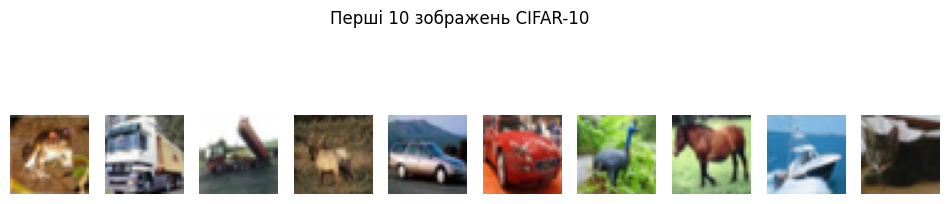

In [9]:
tf.random.set_seed(42)
np.random.seed(42)
random.seed(42)

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
print("Shapes:", x_train.shape, y_train.shape, x_test.shape, y_test.shape)

plt.figure(figsize=(12,3))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.imshow(x_train[i].astype('uint8'))
    plt.axis('off')
plt.suptitle("Перші 10 зображень CIFAR-10")
plt.show()

In [10]:
NUM_CLASSES = 10

TRAIN_SUBSET = 10000
TEST_SUBSET = 2000

x_train_sub = x_train[:TRAIN_SUBSET].astype('float32') / 255.0
y_train_sub = to_categorical(y_train[:TRAIN_SUBSET], NUM_CLASSES)
x_test_sub = x_test[:TEST_SUBSET].astype('float32') / 255.0
y_test_sub = to_categorical(y_test[:TEST_SUBSET], NUM_CLASSES)

print("Subset shapes:", x_train_sub.shape, y_train_sub.shape, x_test_sub.shape, y_test_sub.shape)

Subset shapes: (10000, 32, 32, 3) (10000, 10) (2000, 32, 32, 3) (2000, 10)


In [11]:
def build_simple_cnn(input_shape=(32,32,3), num_classes=10):
    model = models.Sequential([
        layers.Input(shape=input_shape),

        layers.Conv2D(32, (3,3), padding='same', activation='relu'),
        layers.BatchNormalization(),
        layers.Conv2D(32, (3,3), padding='same', activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPool2D(),
        layers.Dropout(0.25),

        layers.Conv2D(64, (3,3), padding='same', activation='relu'),
        layers.BatchNormalization(),
        layers.Conv2D(64, (3,3), padding='same', activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPool2D(),
        layers.Dropout(0.25),

        layers.Conv2D(128, (3,3), padding='same', activation='relu'),
        layers.BatchNormalization(),
        layers.MaxPool2D(),

        layers.GlobalAveragePooling2D(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.4),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model

model = build_simple_cnn()
model.compile(optimizer=optimizers.Adam(learning_rate=3e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
model.summary()

callbacks = [
    EarlyStopping(monitor='val_accuracy', patience=6, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6, verbose=1)
]

EPOCHS = 10
BATCH_SIZE = 64

history = model.fit(
    x_train_sub, y_train_sub,
    validation_data=(x_test_sub, y_test_sub),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    callbacks=callbacks,
    shuffle=True,
    verbose=2
)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 158,506 (619.16 KB)

 Trainable params: 157,866 (616.66 KB)

 Non-trainable params: 640 (2.50 KB)

Epoch 1/10
157/157 - 81s - 514ms/step - accuracy: 0.2895 - loss: 1.9397 - val_accuracy: 0.1290 - val_loss: 2.8240 - learning_rate: 3.0000e-04
Epoch 2/10
157/157 - 83s - 531ms/step - accuracy: 0.4019 - loss: 1.6466 - val_accuracy: 0.1020 - val_loss: 3.8386 - learning_rate: 3.0000e-04
Epoch 3/10
157/157 - 79s - 504ms/step - accuracy: 0.4582 - loss: 1.4953 - val_accuracy: 0.2030 - val_loss: 2.5575 - learning_rate: 3.0000e-04
Epoch 4/10
157/157 - 85s - 544ms/step - accuracy: 0.4991 - loss: 1.3937 - val_accuracy: 0.4450 - val_loss: 1.5141 - learning_rate: 3.0000e-04
Epoch 5/10
157/157 - 135s - 860ms/step - accuracy: 0.5343 - loss: 1.3099 - val_accuracy: 0.5115 - val_loss: 1.3515 - learning_rate: 3.0000e-04
Epoch 6/10
157/157 - 77s - 489ms/step - accuracy: 0.5621 - loss: 1.2348 - val_accuracy: 0.5245 - val_loss: 1.3119 - learning_rate: 3.0000e-04
Epoch 7/10
157/157 - 76s - 483ms/step - accuracy: 0.5781 - loss: 1.1849 - val_accuracy: 0.5465 - val_loss: 1.2480 - learning_rate: 3.0000e-04
Epoch

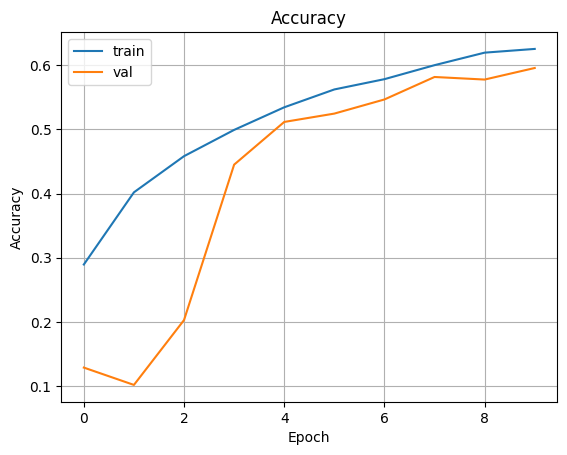

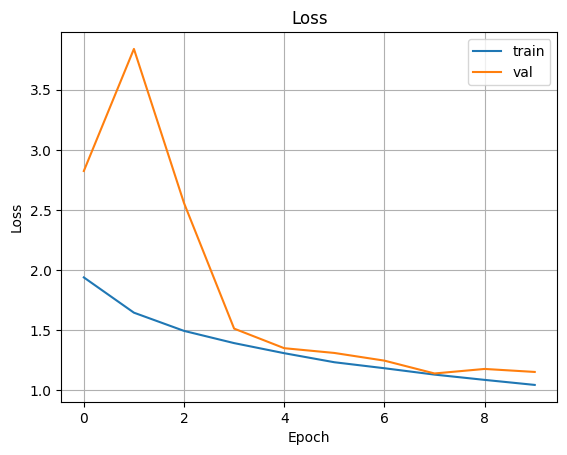

In [13]:
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['train','val'])
plt.grid(True)
plt.show()

plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['train','val'])
plt.grid(True)
plt.show()

63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 75ms/step
Classification report:
              precision    recall  f1-score   support

           0     0.7938    0.3929    0.5256       196
           1     0.8503    0.6313    0.7246       198
           2     0.5600    0.3590    0.4375       195
           3     0.3674    0.5779    0.4492       199
           4     0.5156    0.5859    0.5485       198
           5     0.4937    0.4216    0.4548       185
           6     0.6212    0.7593    0.6833       216
           7     0.7250    0.6010    0.6572       193
           8     0.5831    0.8894    0.7044       217
           9     0.7611    0.6749    0.7154       203

    accuracy                         0.5955      2000
   macro avg     0.6271    0.5893    0.5901      2000
weighted avg     0.6274    0.5955    0.5932      2000



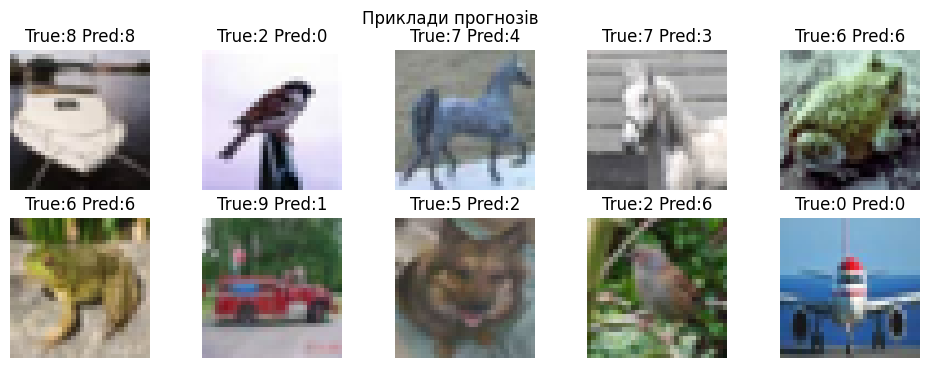

In [14]:
y_pred_probs = model.predict(x_test_sub)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test_sub, axis=1)
print("Classification report:")
print(classification_report(y_true, y_pred, digits=4))

indices = np.random.choice(len(x_test_sub), 10, replace=False)
plt.figure(figsize=(12,4))
for i, idx in enumerate(indices):
    plt.subplot(2,5,i+1)
    plt.imshow((x_test_sub[idx]*255).astype('uint8'))
    plt.axis('off')
    plt.title(f"True:{y_true[idx]} Pred:{y_pred[idx]}")
plt.suptitle("Приклади прогнозів")
plt.show()